In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [46]:
sns.set_style("white")
df = pd.read_csv("wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


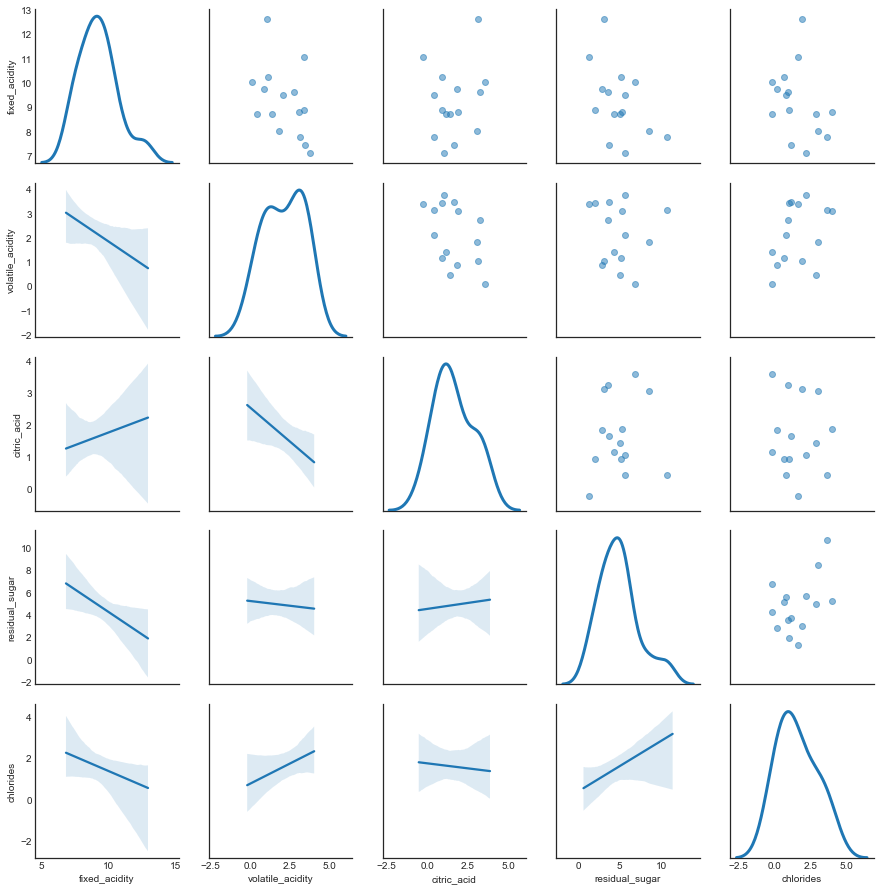

In [132]:
diamond = df.loc[((df['quality'] == 5) | (df['quality'] == 6)) & (df['alcohol'] == 9.4),
                      ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides']]
df_jittered = diamond.loc[:, 'fixed_acidity':'chlorides'].dropna()

jitter = pd.DataFrame(np.random.uniform(-.3, 4, size=(df_jittered.shape)), columns=df_jittered.columns)

df_jittered = df_jittered.add(jitter)

g = sns.PairGrid(df_jittered.dropna(), diag_sharey = False)

g.map_upper(plt.scatter, alpha = .5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)

plt.show()

                  fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity          1.000000         -0.014012     0.495194   
volatile_acidity      -0.014012          1.000000    -0.441498   
citric_acid            0.495194         -0.441498     1.000000   
residual_sugar        -0.044511          0.191111    -0.104431   
chlorides              0.008294         -0.104490     0.431494   

                  residual_sugar  chlorides  
fixed_acidity          -0.044511   0.008294  
volatile_acidity        0.191111  -0.104490  
citric_acid            -0.104431   0.431494  
residual_sugar          1.000000  -0.118964  
chlorides              -0.118964   1.000000  


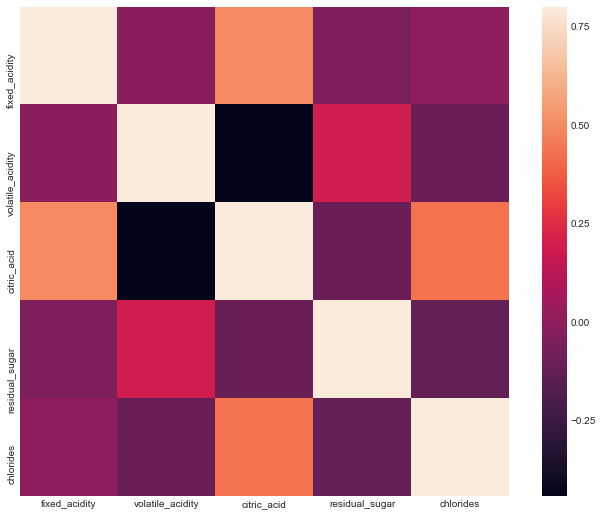

In [49]:
corrmat = diamond.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

"""
df_long = diamond
df_long = pd.melt(df_long, id_vars=['alcohol'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "alcohol", "value")
plt.show()

print(diamond.groupby('alcohol').describe())

for col in diamond.loc[:,'fixed_acidity':'chlorides'].columns:
    print(col)
    print(stats.ttest_ind(
        diamond[diamond['alcohol'] == 9.4][col].dropna(),
        diamond[diamond['alcohol'] == 9.5][col].dropna()
    ))
    
Cannot run the Box plot since this data have no categorical data...
Same as for plotting two categorical variables... """

In [62]:
print(df.head())
print(df.quality.unique())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [63]:
features = pd.get_dummies(df['quality'])

features['Nordic'] = np.where((df['quality'].isin([9.4, 9.8])), 1, 0)

print(pd.crosstab(features["Nordic"], df['quality']))

quality   3   4    5    6    7   8
Nordic                            
0        10  53  681  638  199  18


In [64]:
features['wine'] = np.where(df['pH'] >= 3.0, 1, 0)

print(df['pH'].groupby(features['wine']).describe())

       count      mean       std   min   25%   50%   75%   max
wine                                                          
0       29.0  2.922414  0.052144  2.74  2.89  2.93  2.95  2.99
1     1570.0  3.318293  0.146229  3.00  3.21  3.31  3.40  4.01


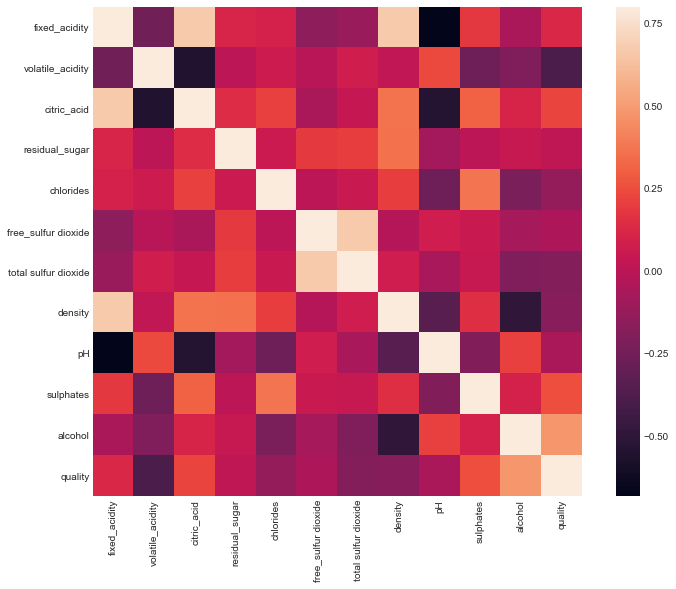

            density        pH  sulphates     white
density    1.000000 -0.341699   0.148506  0.541455
pH        -0.341699  1.000000  -0.196648  0.309819
sulphates  0.148506 -0.196648   1.000000  0.638800
white      0.541455  0.309819   0.638800  1.000000


In [66]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

means = df[['density', 'pH', 'sulphates']].mean(axis=0)
stds = df[['density', 'pH', 'sulphates']].std(axis=0)
features['white'] = ((df[['density', 'pH', 'sulphates']] - means)/ stds).mean(axis=1)
plotdf = df.loc[:, ['density', 'pH', 'sulphates']]
plotdf['white'] = features['white']
corrmat2 = plotdf.corr()

print(corrmat2)

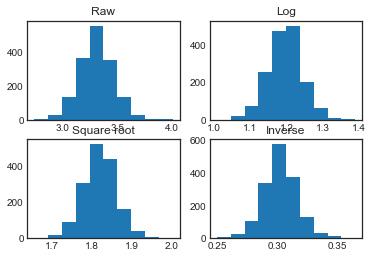

In [72]:
fig = plt.figure()
fig.add_subplot(221)
plt.hist(df['pH'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['pH'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['pH'].dropna()))
plt.title("Square root")

fig.add_subplot(224)
plt.hist(1/df['pH'].dropna())
plt.title('Inverse')
plt.show()

features['log_age'] = np.log(df['pH'])

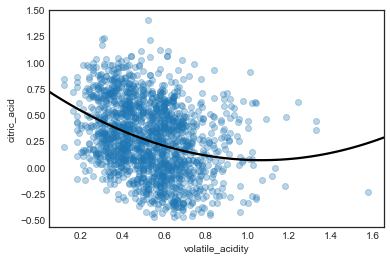

In [80]:
sns.regplot(
    df['volatile_acidity'],
    y=df['citric_acid'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['age_squared'] = df['volatile_acidity'] * df['volatile_acidity']

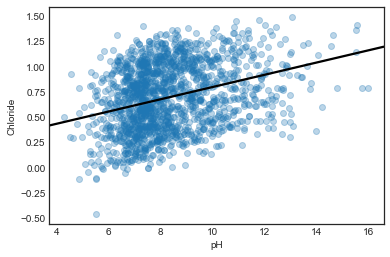

In [77]:
features['acid'] = max(df['pH']) - df['pH']

sns.regplot(
    df['fixed_acidity'],
    features['acid'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('pH')
plt.ylabel('Chloride')
plt.show()

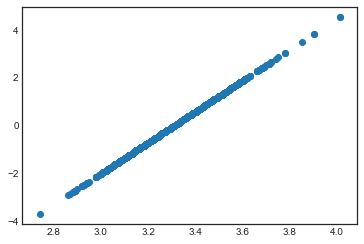

       fixed_acidity  volatile_acidity   citric_acid  residual_sugar  \
count   1.599000e+03      1.599000e+03  1.599000e+03    1.599000e+03   
mean    3.435512e-16      1.699704e-16  4.335355e-16   -1.905223e-16   
std     1.000313e+00      1.000313e+00  1.000313e+00    1.000313e+00   
min    -2.137045e+00     -2.278280e+00 -1.391472e+00   -1.162696e+00   
25%    -7.007187e-01     -7.699311e-01 -9.293181e-01   -4.532184e-01   
50%    -2.410944e-01     -4.368911e-02 -5.636026e-02   -2.403750e-01   
75%     5.057952e-01      6.266881e-01  7.652471e-01    4.341614e-02   
max     4.355149e+00      5.877976e+00  3.743574e+00    9.195681e+00   

          chlorides  free_sulfur dioxide  total sulfur dioxide       density  \
count  1.599000e+03         1.599000e+03          1.599000e+03  1.599000e+03   
mean   4.838739e-16         1.432042e-16          1.289532e-16  2.336509e-14   
std    1.000313e+00         1.000313e+00          1.000313e+00  1.000313e+00   
min   -1.603945e+00        -1.4

In [81]:
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['pH'], df_scaled['pH'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

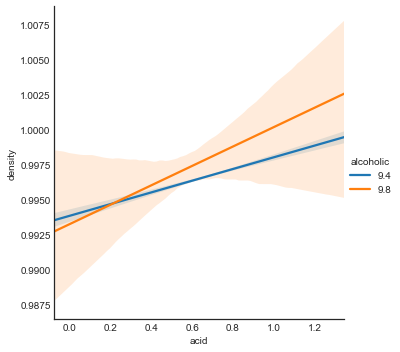

In [127]:
features['alcoholic'] = np.where(df['quality'] == 3, 9.8, 9.4)

# Create the interaction.
features['Sad_Partner'] = features['acid'] * features['alcoholic']

# A plot of an interaction.
features['density'] = df['density']
sns.lmplot(
    x='acid',
    y='density',
    hue='alcoholic',
    data=features,
    scatter=False
)
plt.show()

"""
1. We have the bivariate, it compares the quality of wine 5 and 6 with alcohol of 9.4. It shows the fixed, volatile acidity, citric acid, sugar and chlorides in those wines.
2. We have a heat map, to shows which when two combines, which one come out highest/lowest.
3. Third suppose to be a Box plot, but since we do not have a category, it does not work.
4. Don't have 2 categorical variables to plot this. '
5. A bigger heatmap, with all the wine components in it, to have a better correlation. 
6. This shows the raw, log, sqroot, and inverse of pH.
7. Square volatile_acidity to see how it curves on the graph, sometime different viewing can help viewers to see different outcome. That is why we sometime, change the way we look at graphs. 
8. Measure of pH, to see it low or high. Higher score mean less pH. More Acidity.
9. This help leveling the field to have a more precise data.
10. This show that wine with high density will have high acidity as well."""

"""
1. Heatmap is my number one choice as it is very clear and easy to read. Maybe youre looking for high acidity, then look for light color.
2. My second choice is the leveling field, where it normalize all the variable so it easier for us to tell if the graph is increasing or not.
3. Reverse coding, it shows a line through the middle to let us know more clearly the average of the data. 
4. Box plot, it very organize and clear to see where the average, lowest and highest when you look at the graph.
5. barh graph, very easy on the eyes when comparing 2 categorical variables side by side."""